# Nom du groupe
1. OISSAFE Imad
2. ENNASTY Hamza
3. LATRACH El Habib

importation des bibliothèques

In [286]:
#  import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

importation des données

In [287]:
df = pd.read_excel('data.xlsx', index_col=0).drop(columns=[ 'Profession', 'Email_domain', 'Interests', 'Image_profile','I10_index','Toutes_citedby_2018','H_Index_2018','I10_Index_2018','H_Index_2018.1','i10_Index_2018'])
df.head()

,Nombre_Publication,Total_Citedby,H_Index,Nombre_couteurs,Experience_years
Nom,,,,,
Aziz_Ouaarab,20,751,8,3,10
Essaid El Bachari,47,433,9,2,12
GAMRANI,268,2129,27,0,39
Hajar Mousannif,105,2928,22,9,11
HAMZA LAMSYEHE,46,285,8,0,4


Standardisation des données

In [288]:
# Sélectionner les colonnes numériques à centrer et réduire
columns_to_scale = df.columns

# Centrer et réduire les données
df_scaled = scale(df[columns_to_scale])

# Créer un nouveau DataFrame avec les données centrées et réduites
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Afficher le DataFrame avec les données centrées et réduites
df_scaled.head()

,Nombre_Publication,Total_Citedby,H_Index,Nombre_couteurs,Experience_years
0,-0.634288,-0.632994,-0.892434,-0.304636,-0.455286
1,-0.523474,-0.828850,-0.797738,-0.452474,-0.216803
2,0.383558,0.215714,0.906781,-0.748150,3.002721
3,-0.285430,0.707816,0.433304,0.582392,-0.336045
4,-0.527579,-0.920002,-0.892434,-0.748150,-1.170736


In [289]:
# Calculer les moyennes et les écarts-types des colonnes centrées et réduites
means = df_scaled.mean()
std_devs = df_scaled.std()

# Afficher les moyennes
print("Moyennes après centrage et réduction :\n", means)

# Afficher les écarts-types
print("\nÉcarts-types après centrage et réduction :\n", std_devs)

Moyennes après centrage et réduction :
 Nombre_Publication    9.420074e-17
Total_Citedby        -6.728624e-18
H_Index              -1.076580e-16
Nombre_couteurs       2.691450e-17
Experience_years     -3.027881e-17
dtype: float64

Écarts-types après centrage et réduction :
 Nombre_Publication    1.015505
Total_Citedby         1.015505
H_Index               1.015505
Nombre_couteurs       1.015505
Experience_years      1.015505
dtype: float64


In [290]:
# Calculer la matrice de covariance
inertia_matrix = df_scaled.cov()

# Afficher la matrice de covariance
print("Matrice d'inertie :\n")
inertia_matrix


Matrice d'inertie :



,Nombre_Publication,Total_Citedby,H_Index,Nombre_couteurs,Experience_years
Nombre_Publication,1.031250,0.786477,0.721851,0.688518,0.416753
Total_Citedby,0.786477,1.031250,0.908617,0.721048,0.581319
H_Index,0.721851,0.908617,1.031250,0.610361,0.656872
Nombre_couteurs,0.688518,0.721048,0.610361,1.031250,0.220005
Experience_years,0.416753,0.581319,0.656872,0.220005,1.031250


### valeurs Propres

In [291]:
# Calculer les valeurs propres
eigenvalues, _ = np.linalg.eig(inertia_matrix)

# Afficher les valeurs propres
print("Valeurs propres :\n", eigenvalues)

Valeurs propres :
 [3.6103536  0.86796136 0.10676399 0.31077136 0.26039968]


In [292]:
# Calculer la variance et la variance cumulée
total_variance = np.sum(eigenvalues)
variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Afficher les résultats
print("Variance associée à chaque valeur propre :\n", eigenvalues)
print("\nVariance cumulée associée à chaque valeur propre :\n", cumulative_variance_ratio)


Variance associée à chaque valeur propre :
 [3.6103536  0.86796136 0.10676399 0.31077136 0.26039968]

Variance cumulée associée à chaque valeur propre :
 [0.70018979 0.86852169 0.88922743 0.94949824 1.        ]


On remarque que les deux premières composantes principales expliquent environ de 86% d'information.

### Scree plot

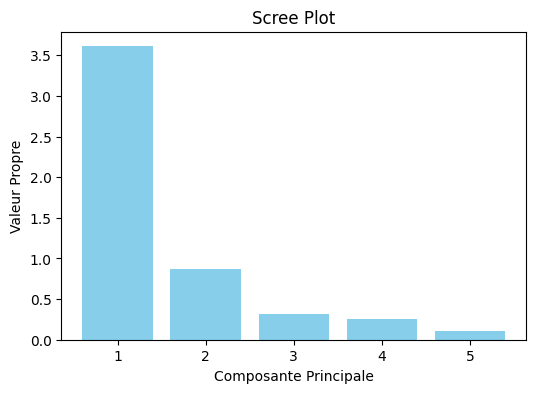

In [293]:
# Calculer les valeurs propres
eigenvalues, _ = np.linalg.eig(inertia_matrix)

# Trier les valeurs propres en ordre décroissant
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Tracer le scree plot
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, color='skyblue')
plt.xlabel('Composante Principale')
plt.ylabel('Valeur Propre')
plt.title('Scree Plot')
plt.show()

On remarque que cette figure confirme bien le resultat obtenue précedement.

### Vecteurs Propres

In [294]:
# Calculer les valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(inertia_matrix)

# Afficher les vecteurs propres
print("Vecteurs propres :\n", eigenvectors)

Vecteurs propres :
 [[ 0.45841397  0.24150342  0.0764459  -0.8012932   0.28916769]
 [ 0.50678598  0.01742691 -0.76559651  0.08240366 -0.38721555]
 [ 0.49282239 -0.1655008   0.62364887  0.08302719 -0.5778444 ]
 [ 0.4104479   0.5637071   0.13519132  0.56776614  0.41609104]
 [ 0.34883121 -0.77215037 -0.02834437  0.14794233  0.50932333]]


### Axes et composantes principales

In [295]:

# Triez les valeurs propres
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculez le taux d'information cumulatif
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Trouvez le nombre d'axes nécessaires pour atteindre un taux d'information proche de 95%
desired_variance_ratio = 0.80
num_axes = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

print("Nombre d'axes pour atteindre {} % d'information c'est : {}".format(desired_variance_ratio * 100, num_axes))


Nombre d'axes pour atteindre 80.0 % d'information c'est : 2


In [296]:
# Triez les vecteurs propres en fonction des indices triés des valeurs propres pour que les vecteurs propres les plus importants apparaissent en premier
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Sélectionnez les premiers 'num_axes' vecteurs propres avec les valeurs propres les plus importantes
principal_components = sorted_eigenvectors[:, :2]

print("Les composantes principales sont :")
print(principal_components)

Les composantes principales sont :
[[ 0.45841397  0.24150342]
 [ 0.50678598  0.01742691]
 [ 0.49282239 -0.1655008 ]
 [ 0.4104479   0.5637071 ]
 [ 0.34883121 -0.77215037]]


### Scores d'individus

In [297]:
# Projetez les données sur les composantes principales
X_pca = np.dot(df_scaled, principal_components)

print("Les scores des individus sur les composantes principales sont :")
print(X_pca)

Les scores des individus sur les composantes principales sont :
[[-1.33522549  0.16330866]
 [-1.31450503 -0.09649699]
 [ 1.4723975  -2.79397274]
 [ 0.5632269   0.45946609]
 [-1.86337073  0.48650065]
 [-0.67847825  0.486377  ]
 [-1.5727283   0.2295576 ]
 [-2.16615896  0.40907535]
 [-1.62159495 -0.13316321]
 [ 1.74030005 -1.00764068]
 [ 2.51707721 -0.11354915]
 [ 0.01628225 -2.11874069]
 [-1.62673344 -0.42005977]
 [-1.88624896  0.23790647]
 [-1.36996818 -0.59719102]
 [ 2.3341219   0.59062856]
 [-1.70100221  0.46308901]
 [-2.38013646  0.7260445 ]
 [-1.48452066  0.62356193]
 [ 4.42289336  1.39561188]
 [ 0.86439682 -0.32082603]
 [ 2.70570825  0.8977797 ]
 [ 1.41462794 -1.16350681]
 [-0.67816612  0.48638774]
 [-0.12499773 -1.15309039]
 [-1.53050551  0.33904219]
 [ 1.73411624 -0.72679089]
 [-0.1471337   1.32649893]
 [ 1.4822145   0.11345795]
 [-0.0940856   0.03456626]
 [ 0.07546968 -0.90296957]
 [-2.19796889  0.68325727]
 [ 4.43069657  1.39588021]]


### Visualisation des individus

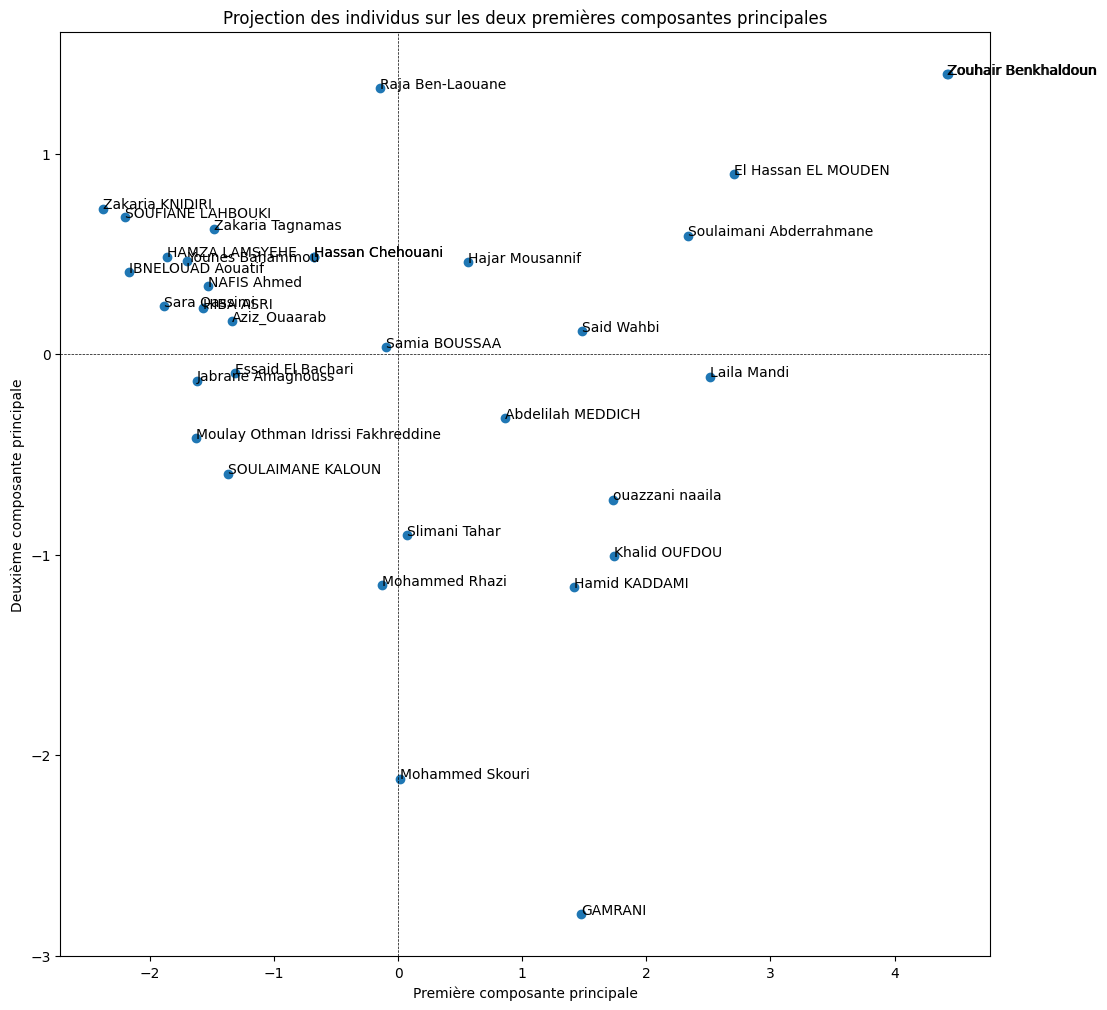

In [298]:
# Séparer les étiquettes et les données
labels = df.index
data = df


# Créez un graphique de dispersion des scores sur les deux premières composantes principales
plt.figure(figsize=(12, 12))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Ajouter le repère (0, 0)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Ajoutez des étiquettes aux points
for i, label in enumerate(labels):
    plt.text(X_pca[i, 0], X_pca[i, 1], label)

# Ajoutez des titres et des étiquettes d'axe
plt.title('Projection des individus sur les deux premières composantes principales')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

# Affichez le graphique
plt.show()

- On voit clairement que Laila Mandi est extrêmement corrélé avec l’axe horizontal. De même, Mohammed Skouri ,GAMRANI et Raja Ben-Laouane notamment sont très bien correlés à l’axe vertical.
- Samia BOUSSAA situés près du centre  donc généralement mal représenté par le plan factoriel. Leur interprétation ne peut donc pas être effectuée avec confiance.
- On Remarquement que HIBA ASRI et Sara Qassimi sont très similaires 
- On Remarquement que Zouhair Benkhaldoun et Mohammed Skouri. sont Dissemblable

### Contributions des individus

In [299]:
# Calculez la somme des carrés des scores pour chaque composante principale
ss = np.sum(X_pca**2, axis=0)

# Calculez la contribution de chaque individu à chaque composante principale
contributions = (X_pca**2 / ss) * 100

contributions = pd.DataFrame(contributions)
print("Les contributions des individus aux composantes principales sont :")
print(contributions)


Les contributions des individus aux composantes principales sont :
            0          1
0    1.543155   0.096021
1    1.495632   0.033526
2    1.876508  28.105671
3    0.274579   0.760075
4    3.005376   0.852151
5    0.398448   0.851718
6    2.140956   0.189729
7    4.061448   0.602499
8    2.276067   0.063844
9    2.621492   3.655620
10   5.483948   0.046421
11   0.000229  16.162377
12   2.290515   0.635290
13   3.079628   0.203780
14   1.624506   1.284033
15   4.715713   1.255968
16   2.504437   0.772109
17   4.903475   1.897912
18   1.907536   1.399938
19  16.932193   7.012598
20   0.646735   0.370586
21   6.336686   2.901945
22   1.732147   4.874022
23   0.398082   0.851755
24   0.013524   4.787142
25   2.027543   0.413863
26   2.602895   1.901816
27   0.018738   6.335245
28   1.901614   0.046347
29   0.007662   0.004302
30   0.004930   2.935593
31   4.181608   1.680808
32  16.991992   7.015295


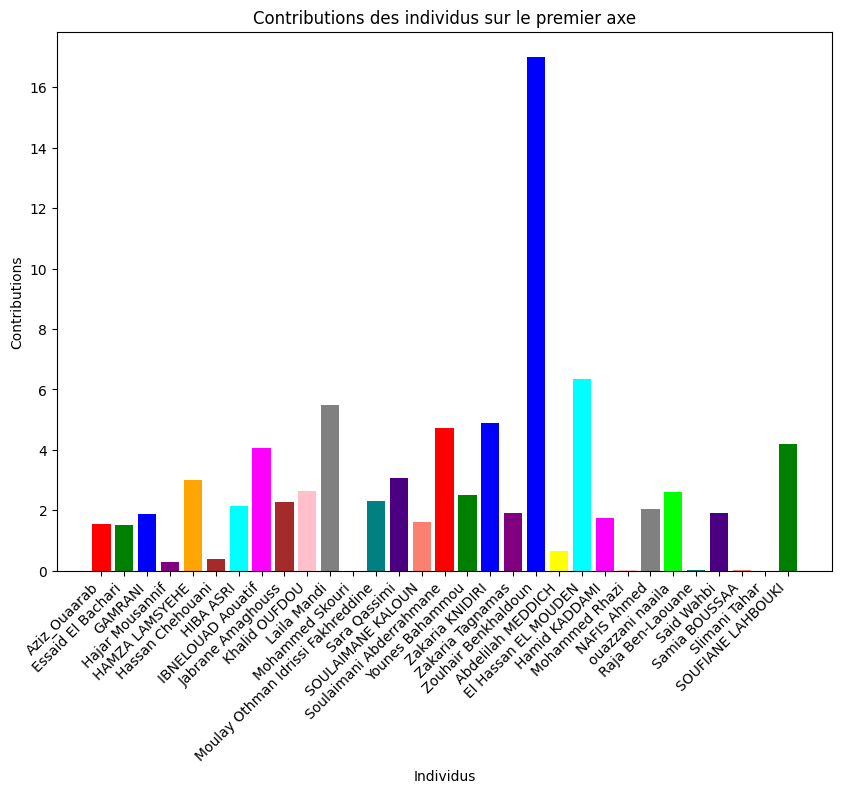

In [300]:
# Créez un graphique à barres des contributions des individus sur le premier axe avec des couleurs différentes
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'grey', 'lime', 'teal', 'indigo', 'salmon']
plt.figure(figsize=(10, 7))
# Accéder aux colonnes du DataFrame contributions
bar_plot = plt.bar(labels, contributions.iloc[:, 0],color=colors)  # Utilisez iloc pour accéder aux colonnes par index


# Ajoutez des titres et des étiquettes d'axe
plt.title('Contributions des individus sur le premier axe')
plt.xlabel('Individus')
plt.ylabel('Contributions')

# Faites pivoter les étiquettes sur l'axe des x
plt.xticks(rotation=45, ha='right')

# Affichez le graphique
plt.show()

- On remarque que pour: Zouhair Benkhaldounr  a des caractéristiques ou des performances qui sont fortement représentées dans  la première composante
- On remarque que pour: Zouhair Benkhaldounr a un grand influence sue la formation de la première composante 

 ### Interpretation

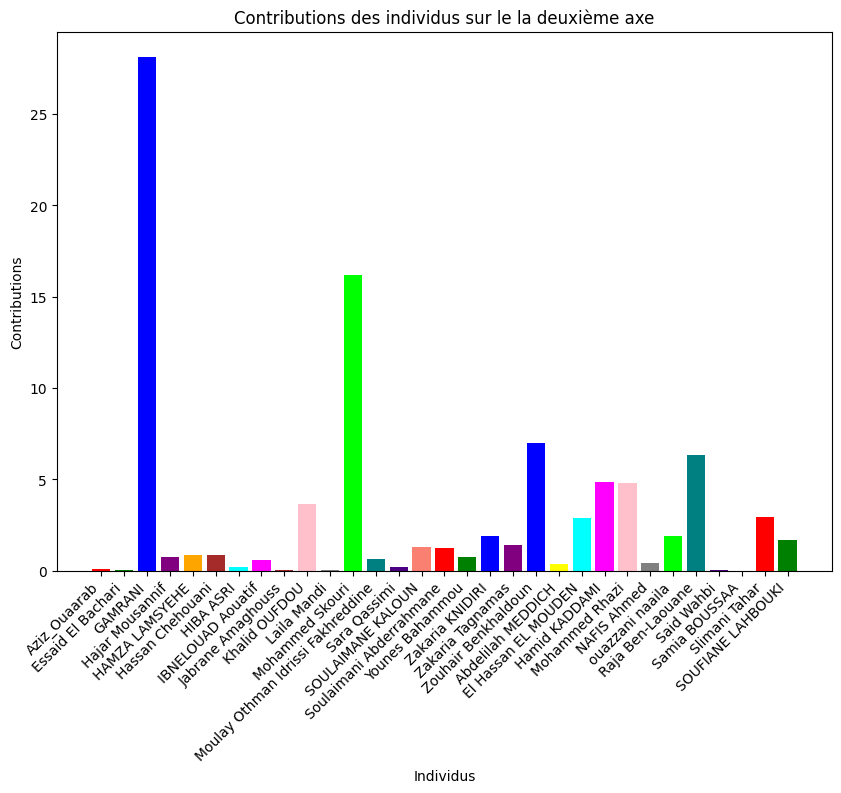

In [301]:
# Créez un graphique à barres des contributions des individus sur le premier axe avec des couleurs différentes
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'grey', 'lime', 'teal', 'indigo', 'salmon']
plt.figure(figsize=(10, 7))
bar_plot = plt.bar(labels, contributions.iloc[:, 1],color=colors)  # Utilisez iloc pour accéder aux colonnes par inde

# Ajoutez des titres et des étiquettes d'axe
plt.title('Contributions des individus sur le la deuxième axe')
plt.xlabel('Individus')
plt.ylabel('Contributions')

# Faites pivoter les étiquettes sur l'axe des x
plt.xticks(rotation=45, ha='right')

# Affichez le graphique
plt.show()

- On remarque que pour: GAMRANI  a des caractéristiques ou des performances qui sont fortement représentées dans  la première composante
- On remarque que pour: GAMRANI a un grand influence sue la formation de la première composante 

 ### Interpretation

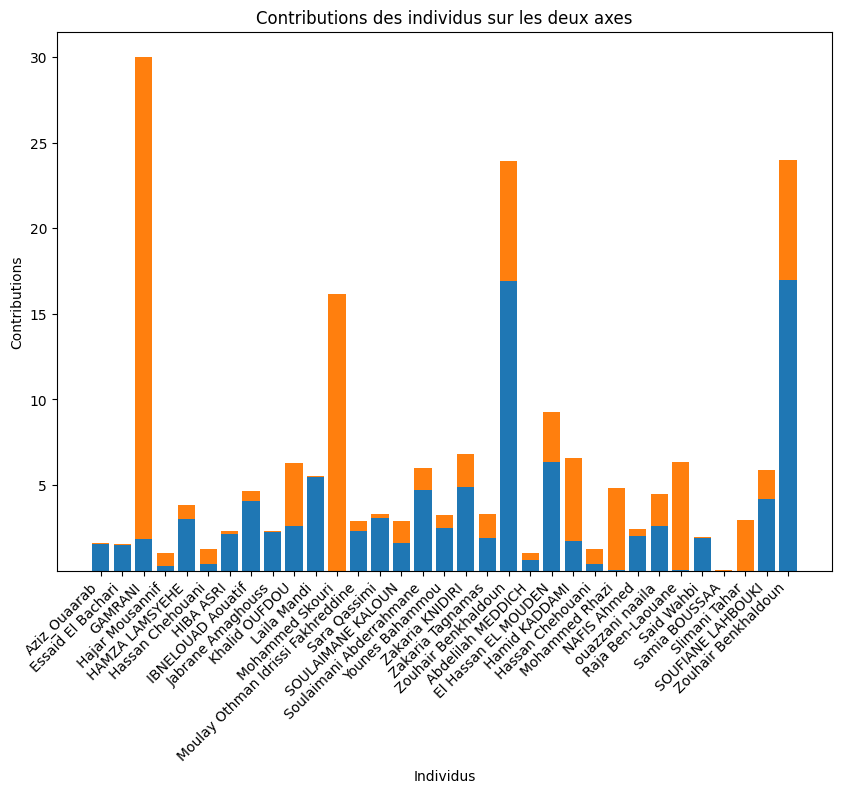

In [302]:
plt.figure(figsize=(10, 7))

# Ajoutez un segment de barre pour chaque axe
for i in range(contributions.shape[1]):
    plt.bar(np.arange(len(contributions)), contributions.iloc[:, i], bottom=np.sum(contributions.iloc[:, :i], axis=1))

# Ajoutez des titres et des étiquettes d'axe
plt.title('Contributions des individus sur les deux axes')
plt.xlabel('Individus')
plt.ylabel('Contributions')

# Faites pivoter et organisez les étiquettes sur l'axe des x
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

# Affichez le graphique
plt.show()


### Qualité de présentation des individus

In [303]:
# Calculez le carré des coordonnées pour chaque individu sur chaque composante principale
coordinates_squared = X_pca**2

# Calculez la somme des carrés des coordonnées pour chaque composante principale
sum_coordinates_squared = np.sum(coordinates_squared, axis=0)

# Calculez la qualité de la représentation pour chaque individu sur chaque composante principale
quality = coordinates_squared / sum_coordinates_squared

print("La qualité de la représentation pour chaque individu sur chaque composante principale est :")
print(quality)

La qualité de la représentation pour chaque individu sur chaque composante principale est :
[[1.54315487e-02 9.60214024e-04]
 [1.49563213e-02 3.35256496e-04]
 [1.87650802e-02 2.81056709e-01]
 [2.74578833e-03 7.60075202e-03]
 [3.00537604e-02 8.52150838e-03]
 [3.98448449e-03 8.51717747e-03]
 [2.14095573e-02 1.89728683e-03]
 [4.06144831e-02 6.02498891e-03]
 [2.27606704e-02 6.38437181e-04]
 [2.62149206e-02 3.65561976e-02]
 [5.48394836e-02 4.64213103e-04]
 [2.29471582e-06 1.61623774e-01]
 [2.29051462e-02 6.35289705e-03]
 [3.07962835e-02 2.03780268e-03]
 [1.62450571e-02 1.28403296e-02]
 [4.71571284e-02 1.25596782e-02]
 [2.50443657e-02 7.72108948e-03]
 [4.90347534e-02 1.89791215e-02]
 [1.90753613e-02 1.39993805e-02]
 [1.69321933e-01 7.01259801e-02]
 [6.46735360e-03 3.70585842e-03]
 [6.33668637e-02 2.90194512e-02]
 [1.73214700e-02 4.87402207e-02]
 [3.98081927e-03 8.51755338e-03]
 [1.35239796e-04 4.78714231e-02]
 [2.02754303e-02 4.13863494e-03]
 [2.60289526e-02 1.90181639e-02]
 [1.87380590e-04 

In [304]:
# Calculez le carré des distances à l'origine pour chaque individu dans chaque plan
distances_squared = np.sum(X_pca**2, axis=1)

# Calculez la somme des carrés des distances pour chaque plan
sum_distances_squared = np.sum(distances_squared)

# Calculez la qualité de la représentation pour chaque individu sur chaque plan
quality = distances_squared / sum_distances_squared

print("La qualité de la représentation pour chaque individu sur chaque plan est PC1,PC2 :")
print(quality)

La qualité de la représentation pour chaque individu sur chaque plan est PC1,PC2 :
[1.26267975e-02 1.21225502e-02 6.96009417e-02 3.68674959e-03
 2.58805026e-02 4.86298508e-03 1.76278008e-02 3.39105454e-02
 1.84730658e-02 2.82192077e-02 4.43007801e-02 3.13268443e-02
 1.96970841e-02 2.52224794e-02 1.55851723e-02 4.04516487e-02
 2.16868675e-02 4.32095429e-02 1.80915638e-02 1.50096341e-01
 5.93213642e-03 5.67098449e-02 2.34108723e-02 4.86010310e-03
 9.38719348e-03 1.71478890e-02 2.46701616e-02 1.24296733e-02
 1.54203685e-02 7.01081607e-05 5.72934321e-03 3.69691767e-02
 1.50583658e-01]


## Etude des variables:

### Matrice de corrrelation

In [305]:
# Calculer la matrice de corrélation
correlation_matrix = df_scaled.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :\n")
correlation_matrix


Matrice de corrélation :



,Nombre_Publication,Total_Citedby,H_Index,Nombre_couteurs,Experience_years
Nombre_Publication,1.000000,0.762644,0.699977,0.667654,0.404125
Total_Citedby,0.762644,1.000000,0.881083,0.699198,0.563703
H_Index,0.699977,0.881083,1.000000,0.591865,0.636967
Nombre_couteurs,0.667654,0.699198,0.591865,1.000000,0.213338
Experience_years,0.404125,0.563703,0.636967,0.213338,1.000000


### Valeurs et Vecteurs propres

In [306]:
# Calculer les valeurs propres et les vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Afficher les valeurs propres
print("Valeurs propres :\n" ,eigenvalues)

print("Vecteurs propres :\n",eigenvectors)


Valeurs propres :
 [3.50094895 0.8416595  0.10352872 0.30135404 0.25250878]
Vecteurs propres :
 [[-0.45841397 -0.24150342 -0.0764459  -0.8012932   0.28916769]
 [-0.50678598 -0.01742691  0.76559651  0.08240366 -0.38721555]
 [-0.49282239  0.1655008  -0.62364887  0.08302719 -0.5778444 ]
 [-0.4104479  -0.5637071  -0.13519132  0.56776614  0.41609104]
 [-0.34883121  0.77215037  0.02834437  0.14794233  0.50932333]]


### Variance

### Axes et Composantes Prinncipales

In [307]:
# Sélectionner les deux premiers vecteurs propres (composantes principales)
principal_components = eigenvectors[:, :2]

# Afficher les composantes principales
print("Composantes principales :\n", principal_components)

Composantes principales :
 [[-0.45841397 -0.24150342]
 [-0.50678598 -0.01742691]
 [-0.49282239  0.1655008 ]
 [-0.4104479  -0.5637071 ]
 [-0.34883121  0.77215037]]


### cercle de correlation

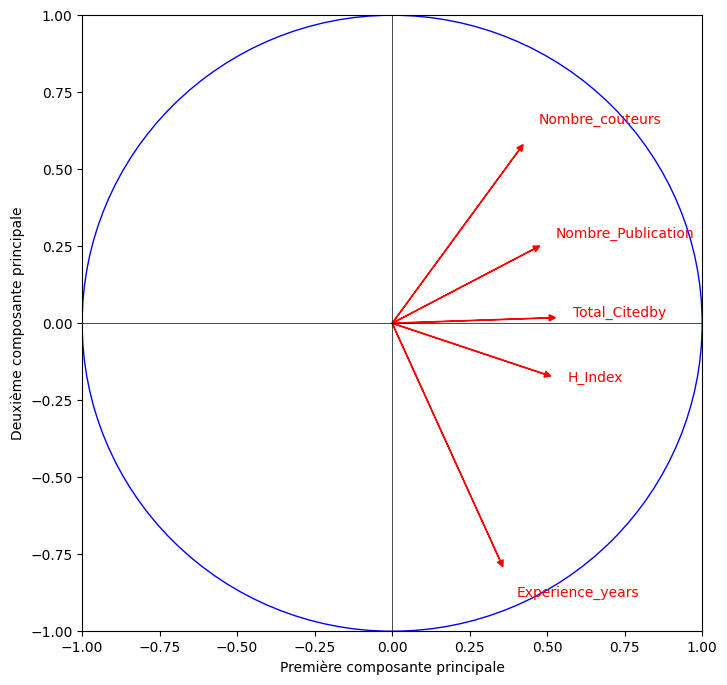

In [310]:
import matplotlib.pyplot as plt

# Supposons que principal_components a déjà été calculé
x=df_scaled
n = x.shape[0]  # nombre d'observation
# Afficher le cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Dessiner le cercle
circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
ax.add_patch(circle)

# Dessiner les flèches des variables
for i in range(p):
    ax.arrow(0, 0, principal_components[i, 0], principal_components[i, 1], head_width=0.02, head_length=0.02, fc='r', ec='r')
    ax.text(principal_components[i, 0] * 1.15, principal_components[i, 1] * 1.15, x.columns[i], color='r')

# Ajouter des axes et des étiquettes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')

# Afficher le graphique
plt.show()


- On remaque une corrélation positive entre h-index est total de citation  et le nombre de publication
- On remaque une corrélation negative  entre les l'années des experiences et la deuxième composante
- On remaque une corrélation positive entre le nombre de couteurs  et la deuxième composante
- On remaque une corrélation positive entre le h-index   et le premiere composante

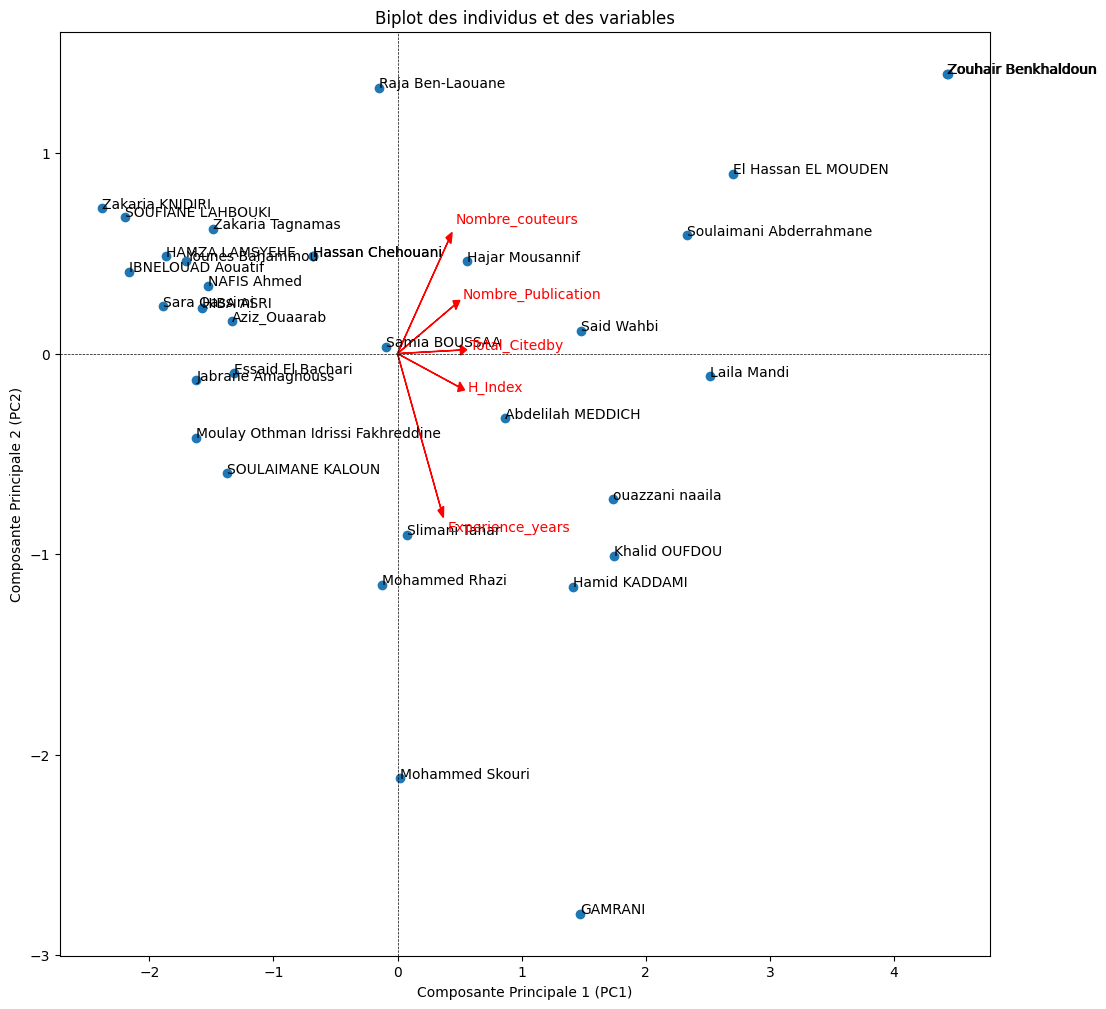

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que X est votre ensemble de données centré et réduit
# Assurez-vous que vous avez déjà calculé la matrice de corrélation
correlation_matrix = np.corrcoef(df_scaled, rowvar=False)

n = df_scaled.shape[0]  # nombre d'observations
p = df_scaled.shape[1]  # nombre de variables

# Calculer les composantes principales (vecteurs propres)
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sélectionner les deux premiers vecteurs propres (composantes principales)
principal_components = eigenvectors[:, :2]

# Calculer les coordonnées des individus dans l'espace des composantes principales
individual_coordinates = np.dot(df_scaled, principal_components)

# Créer un DataFrame pour les coordonnées des individus
individual_df = pd.DataFrame(individual_coordinates, columns=['PC1', 'PC2'])

# Créer un DataFrame pour les vecteurs propres (variables)
variable_df = pd.DataFrame(eigenvectors[:, :2], columns=['PC1', 'PC2'])

# Définir des étiquettes pour chaque individu
labels = df.index


# Créer un biplot
plt.figure(figsize=(12, 12))

# Tracer les individus avec étiquettes
plt.scatter(individual_df['PC1'], individual_df['PC2'])

# Ajouter des étiquettes aux points
for i, label in enumerate(labels):
    plt.text(individual_df.loc[i, 'PC1'], individual_df.loc[i, 'PC2'], label)

# Tracer les variables avec des flèches
for i, variable in enumerate(variable_df.index):
    plt.arrow(0, 0, variable_df.loc[variable, 'PC1'], variable_df.loc[variable, 'PC2'], color='red', head_width=0.05, head_length=0.05)
    plt.text(variable_df.loc[variable, 'PC1'] * 1.15, variable_df.loc[variable, 'PC2'] * 1.15, df_scaled.columns[i], color='r')

# Ajouter le repère (0, 0)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Ajouter des titres et des étiquettes d'axe
plt.title('Biplot des individus et des variables')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')

# Afficher le graphique
plt.show()


- On remarquement que ouzzani naaila , Abdelilah MEDDICH , Said Wahbi et laila Mandi ayant  des valeurs plus élevé dans  le h_index  mais pour  Zakaria KNIDIRI ,Moulay Othman Idrissi Fakhreddine,  jabrane Amaghouss et Aziz_Ouaarab	ayant des valeurs faibles 
- Pour GAMRANI et Mohammad Skouri ayant des grands année d'experience
- Pour SOUFIANE LAHBOUKI ,  Zakaria KNIDIRI et Raja Ben-Laouane ayant moins d'experience
- Pour Laila Mandi ,El Hassan EL MOUDEN et Zouhair Benkhaldoun ayant un nombre de publication important 
- Pour Zakaria KNIDIRI et Moulay Othman Idrissi Fakhreddine ayant un faible nombre de publication

